First 5 rows:


,disease_name,symptoms_list,severity,age_group,triage_level
0,Tinea Corporis (Ringworm),"dryness, scaling, circular rash, itching",mild,adult,self-care
1,Otitis Externa,"hearing loss, joint stiffness, itchy ear canal...",mild,adult,consult doctor
2,Irritable Bowel Syndrome,"diarrhea, bloating, abdominal pain, constipation",mild,elderly,consult doctor
3,Seasonal Influenza (Mild),"dryness, fatigue, sore throat, cough",moderate,child,self-care
4,Tinea Corporis (Ringworm),"red patches, dry cough, scaling, itching, circ...",mild,child,consult doctor



Columns: Index(['disease_name', 'symptoms_list', 'severity', 'age_group',
       'triage_level'],
      dtype='object')

Dataset shape: (920, 5)

Unique severity levels: ['mild' 'moderate']

Unique age groups: ['adult' 'elderly' 'child' 'adolescent']

Unique triage levels: ['self-care' 'consult doctor']
Disease not found in dataset.


,disease_name,symptoms_list,severity,triage_level
5,Seasonal Influenza (Mild),"fatigue, cough, runny nose, sore throat, fever",moderate,self-care
24,Gastritis (Non-Erosive),"nausea, indigestion, upper abdominal pain, mil...",mild,consult doctor
29,Irritable Bowel Syndrome,"abdominal pain, mild fever, diarrhea, bloating...",mild,self-care
33,Seasonal Influenza (Mild),"fatigue, sore throat, runny nose, cough, fever",moderate,consult doctor
38,Acne Vulgaris,"muscle tension, mild fever, pimples, blackhead...",mild,consult doctor
...,...,...,...,...
889,Acne Vulgaris,"mild fever, pimples, blackheads, oily skin, ir...",moderate,self-care
897,Allergic Rhinitis,"sneezing, nasal congestion, itchy eyes, mild f...",mild,self-care
912,Tension Headache,"scalp tenderness, muscle tension, mild fever, ...",moderate,self-care
914,Mild Depression,"fatigue, poor concentration, mild fever, low mood",mild,consult doctor


,disease_name,symptoms_list,severity,age_group,triage_level



Disease count by triage level:
triage_level
consult doctor    436
self-care         484
Name: disease_name, dtype: int64


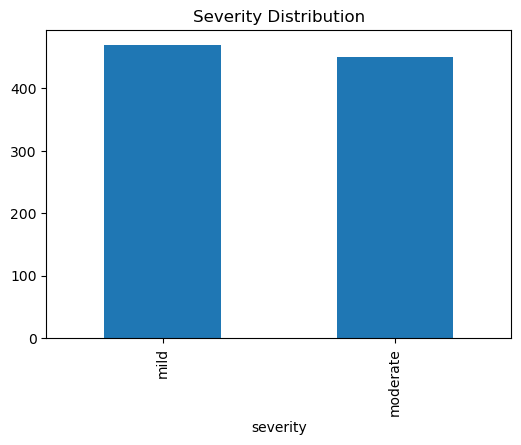

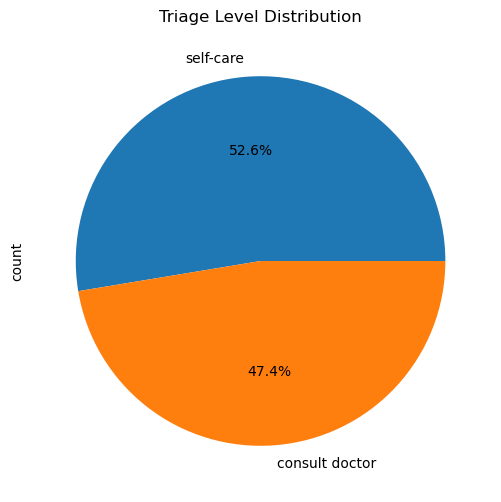

In [1]:
import pandas as pd

# 1. Load dataset (change filename as needed)
df = pd.read_csv("non_emergency_diseases_900.csv")

# 2. Explore dataset
print("First 5 rows:")
display(df.head())

print("\nColumns:", df.columns)
print("\nDataset shape:", df.shape)
print("\nUnique severity levels:", df['severity'].unique())
print("\nUnique age groups:", df['age_group'].unique())
print("\nUnique triage levels:", df['triage_level'].unique())

# 3. Function to get disease details by name
def get_disease_info(disease):
    result = df[df['disease_name'].str.lower() == disease.lower()]
    if not result.empty:
        display(result)
    else:
        print("Disease not found in dataset.")

# Example usage
get_disease_info("Common Cold")

# 4. Function to find possible diseases by symptom
def find_by_symptom(symptom):
    result = df[df['symptoms_list'].str.contains(symptom, case=False, na=False)]
    if not result.empty:
        display(result[['disease_name', 'symptoms_list', 'severity', 'triage_level']])
    else:
        print("No disease found with symptom:", symptom)

# Example usage
find_by_symptom("fever")

# 5. Filter by severity/triage
moderate_cases = df[df['severity'] == "Moderate"]
display(moderate_cases.head())

# 6. Group analysis (e.g., severity count per triage level)
severity_count = df.groupby("triage_level")['disease_name'].count()
print("\nDisease count by triage level:")
print(severity_count)

# 7. Simple visualization
import matplotlib.pyplot as plt

df['severity'].value_counts().plot(kind='bar', title="Severity Distribution", figsize=(6,4))
plt.show()

df['triage_level'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Triage Level Distribution", figsize=(6,6))
plt.show()
